            S4248SM144NCEN
DATE                      
1992-01-01            3459
1992-02-01            3458
1992-03-01            4002
1992-04-01            4564
1992-05-01            4221
----------------------------- 
MSE :  1323.2607421875
the len of the input is: 3 
the hidden units are: 50


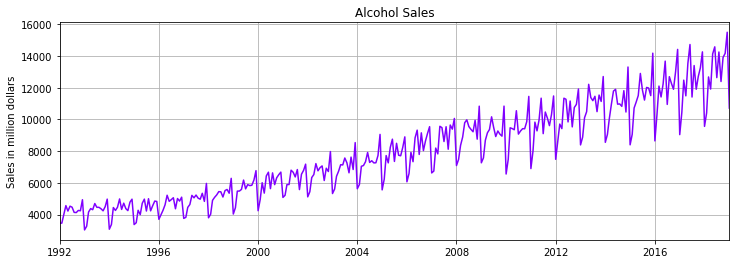

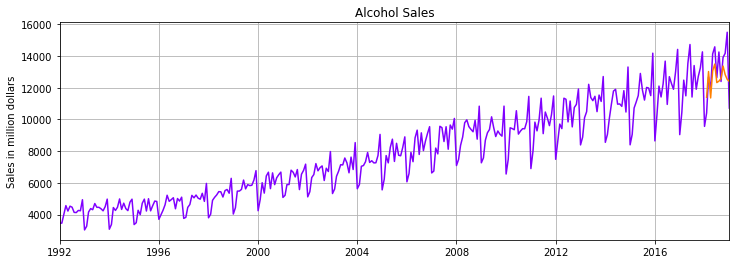

----------------------------- 
MSE :  1667.2216796875
the len of the input is: 3 
the hidden units are: 100


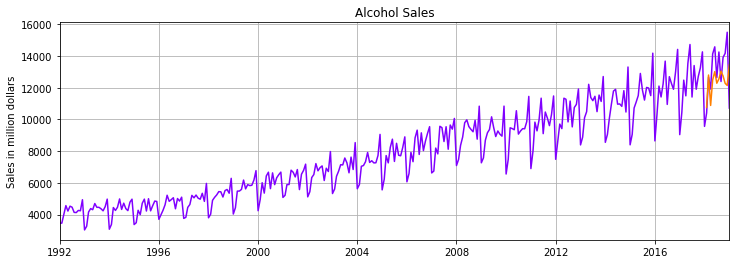

----------------------------- 
MSE :  1887.2645263671875
the len of the input is: 3 
the hidden units are: 150


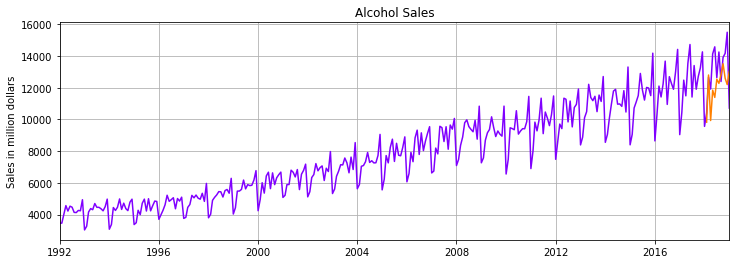

----------------------------- 
MSE :  2204.337646484375
the len of the input is: 3 
the hidden units are: 200


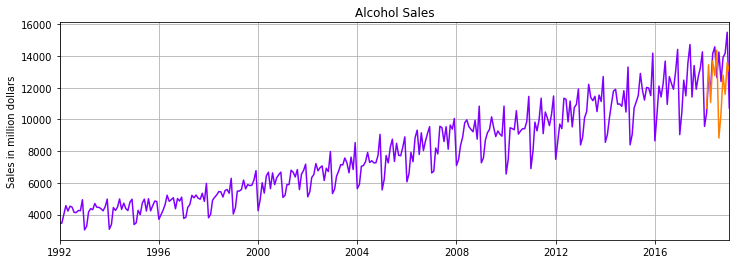

----------------------------- 
MSE :  769.2875366210938
the len of the input is: 6 
the hidden units are: 50


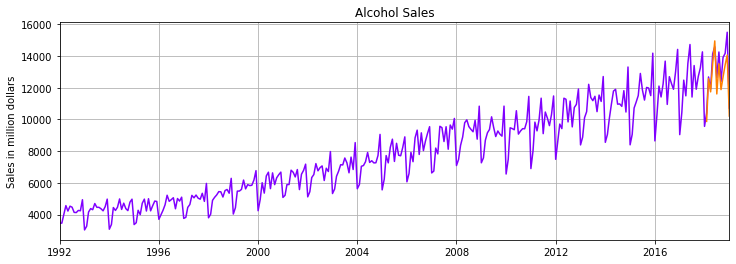

----------------------------- 
MSE :  1283.3140869140625
the len of the input is: 6 
the hidden units are: 100


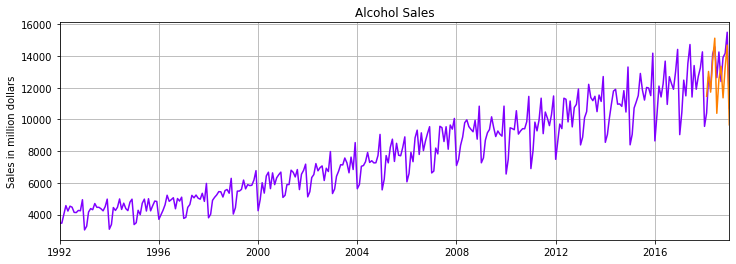

----------------------------- 
MSE :  885.062255859375
the len of the input is: 6 
the hidden units are: 150


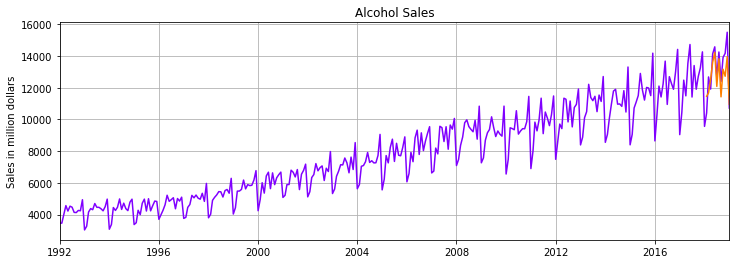

----------------------------- 
MSE :  862.5107421875
the len of the input is: 6 
the hidden units are: 200


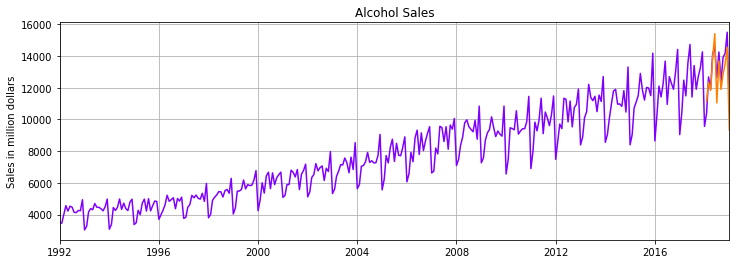

----------------------------- 
MSE :  1565.388671875
the len of the input is: 9 
the hidden units are: 50


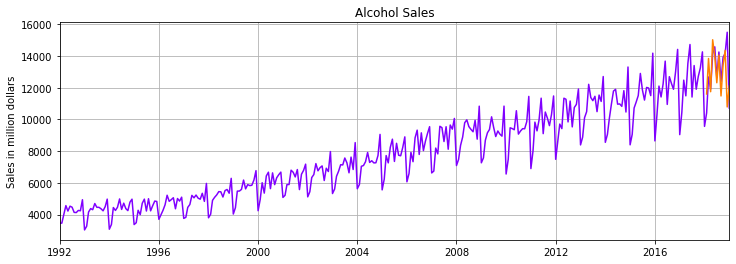

----------------------------- 
MSE :  1147.1396484375
the len of the input is: 9 
the hidden units are: 100


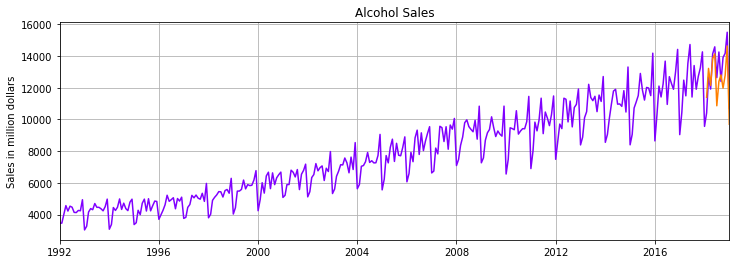

----------------------------- 
MSE :  965.031494140625
the len of the input is: 9 
the hidden units are: 150


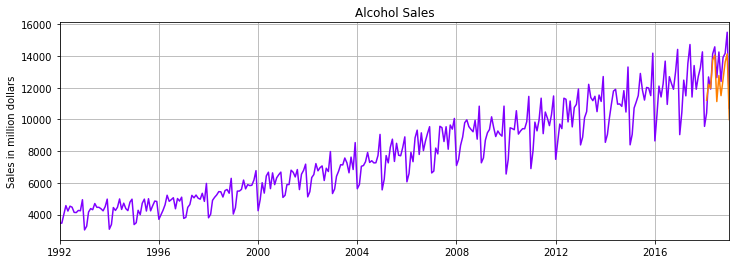

----------------------------- 
MSE :  838.0428466796875
the len of the input is: 9 
the hidden units are: 200


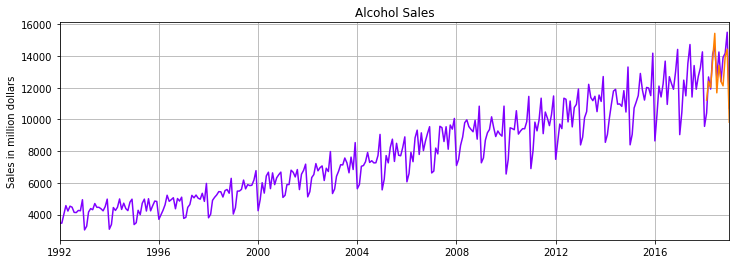

----------------------------- 
MSE :  815.4679565429688
the len of the input is: 12 
the hidden units are: 50


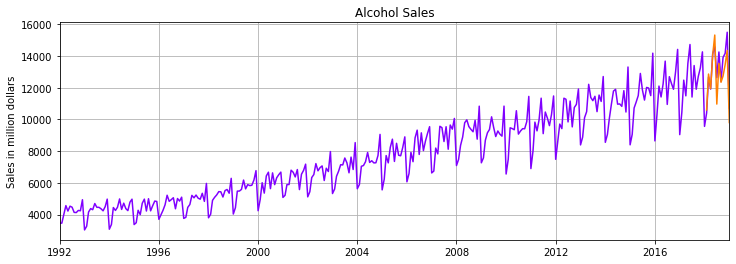

----------------------------- 
MSE :  822.6451416015625
the len of the input is: 12 
the hidden units are: 100


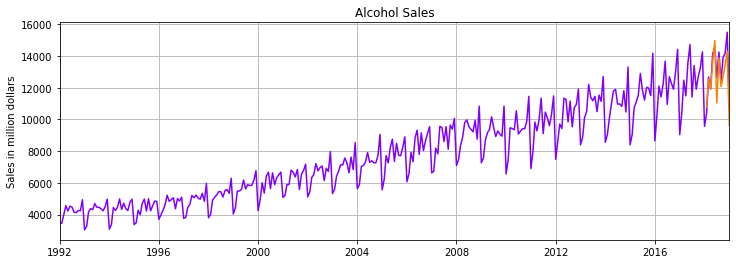

----------------------------- 
MSE :  919.251708984375
the len of the input is: 12 
the hidden units are: 150


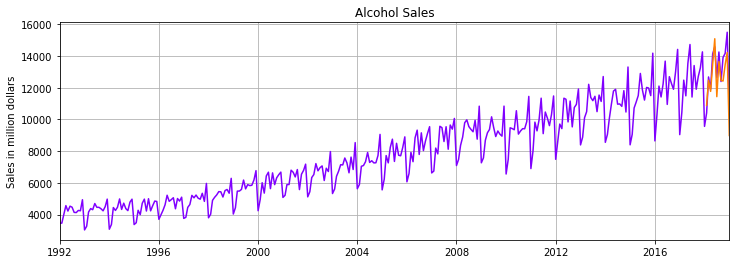

----------------------------- 
MSE :  770.0642700195312
the len of the input is: 12 
the hidden units are: 200


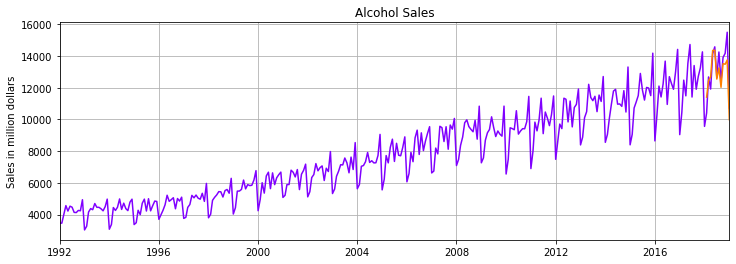

----------------------------- 
MSE :  1170.7574462890625
the len of the input is: 18 
the hidden units are: 50


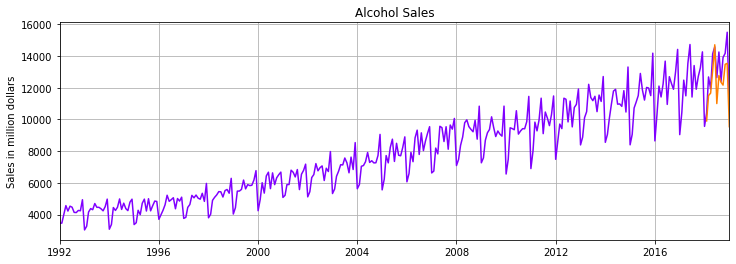

----------------------------- 
MSE :  823.8229370117188
the len of the input is: 18 
the hidden units are: 100


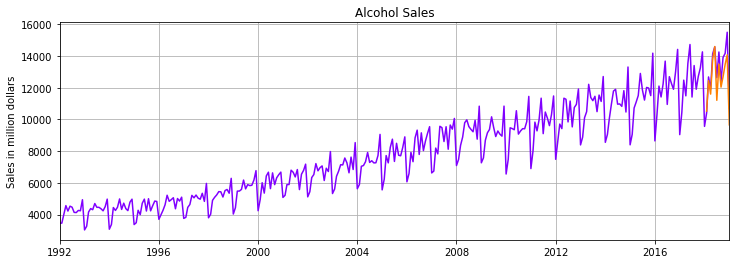

----------------------------- 
MSE :  841.326904296875
the len of the input is: 18 
the hidden units are: 150


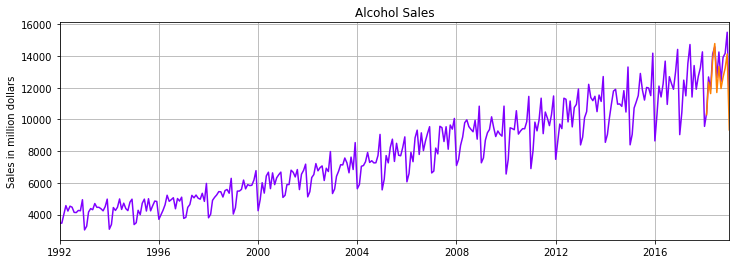

----------------------------- 
MSE :  832.5244140625
the len of the input is: 18 
the hidden units are: 200


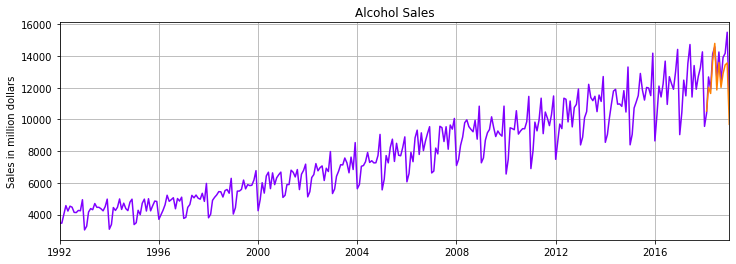

----------------------------- 
MSE :  1442.623046875
the len of the input is: 24 
the hidden units are: 50


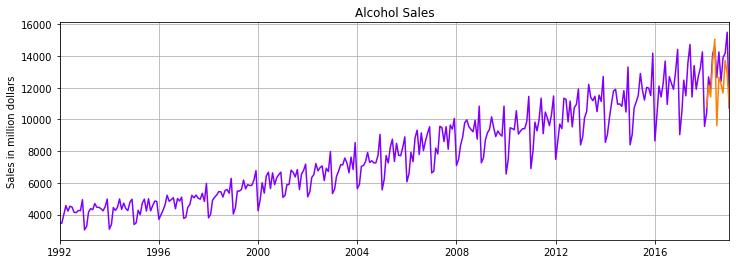

----------------------------- 
MSE :  889.4815063476562
the len of the input is: 24 
the hidden units are: 100


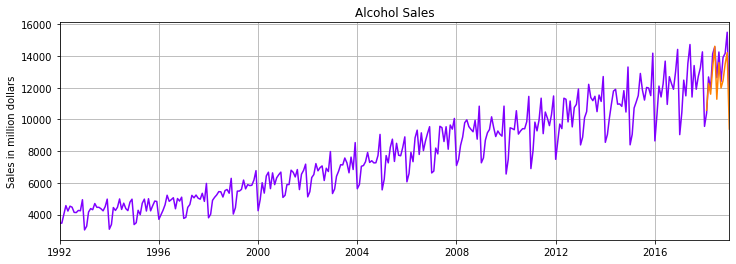

----------------------------- 
MSE :  1065.50048828125
the len of the input is: 24 
the hidden units are: 150


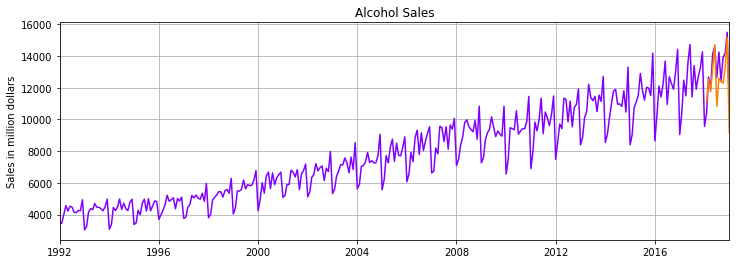

----------------------------- 
MSE :  979.6336059570312
the len of the input is: 24 
the hidden units are: 200


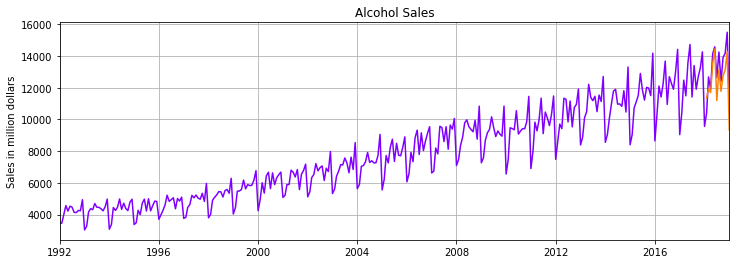

In [2]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

len_net_input = [3, 6, 9, 12, 18, 24]
hidden_units_number = [50, 100, 150, 200]

results_df = pd.DataFrame({"len_input":[],"hidden_units":[], "mean_square_error":[]})

df = pd.read_csv("Alcohol_Sales.csv", index_col = 0, parse_dates = True)
print(df.head())

df.dropna(inplace=True)
# print("len of cleaned dataset:", len(df))

# visualización de datos
plt.figure(figsize = (12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'],color='#8000ff')
# plt.show()

# extracting the time series values
y = df['S4248SM144NCEN'].values.astype(float) 

#defining a test size (los últimos 12 meses para el test final)
test_size = 12

#create train and test splits
train_set = y[:-test_size]
test_set = y[-test_size:]

# print("len of the test set:", len(test_set))

#create train and test splits
train_set = y[:-test_size]
test_set = y[-test_size:]

# print(len(test_set))

# normalización de datos
from sklearn.preprocessing import MinMaxScaler

# instantiate a scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# normalize the training set
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

# convert train_norm to a tensor
train_norm = torch.FloatTensor(train_norm).view(-1)

# define a window size
# aca se define el número de muestras que se utilizan para predecir (como entrada)
# cuantos datos del pasado tomo como referencia para estimar el siguiente
for window_size in len_net_input:

    # define a function to create sequence/label tuples
    def input_data(seq, ws):
        out = []
        L = len(seq)
        for i in range(L-ws): 
            window = seq[i:i+ws]# barro el 'seq' desde el inicio, con un largo de ws
            label = seq[i+ws:i+ws+1] # saco el 'label' siguiente, correspondiente al valor del siguiente año
            out.append((window,label)) # unifico en una list los inputs y el label
        return out

    # apply input_data to train_norm
    train_data = input_data(train_norm, window_size)
    # print('número de datos para entrenar [input, label]: ', len(train_data))
    # print('por ejemplo, el primero: ')
    # print(train_data[0])

    class LSTMnetwork(nn.Module):
        def __init__(self, input_size=1, hidden_size=100, output_size=1):
            super().__init__()
            self.hidden_size = hidden_size
            
            # add an LSTM layer:
            self.lstm = nn.LSTM(input_size,hidden_size)
            
            # add a fully-connected layer:
            self.linear = nn.Linear(hidden_size,output_size)
            
            # initializing h0 and c0:
            self.hidden = (torch.zeros(1,1,self.hidden_size),
                        torch.zeros(1,1,self.hidden_size))

        def forward(self,seq):
            
            lstm_out, self.hidden = self.lstm(
                seq.view(len(seq),1,-1), self.hidden)
            pred = self.linear(lstm_out.view(len(seq),-1))
            return pred[-1]

    torch.manual_seed(42)

    for hidden_size in hidden_units_number:
        # instantiate
        model = LSTMnetwork(input_size=1, hidden_size=hidden_size,  output_size=1)

        # loss
        criterion = nn.MSELoss()

        #optimizer
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        model

        epochs = 150

        import time
        start_time = time.time()

        for epoch in range(epochs):
            for seq, y_train in train_data:
                optimizer.zero_grad()
                
                model.hidden = (torch.zeros(1,1,model.hidden_size),
                                torch.zeros(1,1,model.hidden_size))
                
                y_pred = model(seq)
                
                loss = criterion(y_pred, y_train)
                loss.backward()
                optimizer.step()
                
            # print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
            
        # print(f'\nDuration: {time.time() - start_time:.0f} seconds')

        future = 12 # para fijar cuantos datos a futuro voy a iterar

        # tomo los últimos window_size meses, acorde al entrenamiento del modelo
        preds = train_norm[-window_size:].tolist()
        # print('largo input: ', len(preds))


        model.eval()
        # armo for loop para ir agregando la última predicción y la uso para predecir el futuro
        for i in range(future):
            seq = torch.FloatTensor(preds[-window_size:])
            with torch.no_grad():
                model.hidden = (torch.zeros(1,1,model.hidden_size),
                                torch.zeros(1,1,model.hidden_size))
                salida = model(seq).item()
                preds.append(salida) # acá estoy cargando la última predicción
        # print('largo últimos predecidos: ', len(preds[-future:]))

        true_predictions = scaler.inverse_transform(np.array(preds[-future:]).reshape(-1, 1))
        # print(true_predictions)

        # calculo de error de lo predecido vs el último mes no usado en el entrenamiento
        pred_f = torch.FloatTensor(true_predictions)
        test_norm = df['S4248SM144NCEN'][-12:].to_numpy()
        test_norm = torch.FloatTensor(test_norm)
        loss = criterion(pred_f.squeeze(), test_norm.squeeze())
        print("-----------------------------",'\nMSE : ', torch.sqrt(loss).item())
        print("the len of the input is:", window_size, "\nthe hidden units are:", hidden_size)

        results_df.loc[len(results_df.index)] = [window_size, hidden_size, torch.sqrt(loss).item()]

        x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')
        plt.figure(figsize=(12,4))
        plt.title('Alcohol Sales')
        plt.ylabel('Sales in million dollars')
        plt.grid(True)
        plt.autoscale(axis='x',tight=True)
        plt.plot(df['S4248SM144NCEN'], color='#8000ff')
        plt.plot(x,true_predictions, color='#ff8000')
        plt.show()


In [3]:
print(results_df.sort_values('mean_square_error'))

    len_input  hidden_units  mean_square_error
4         6.0          50.0         769.287537
15       12.0         200.0         770.064270
12       12.0          50.0         815.467957
13       12.0         100.0         822.645142
17       18.0         100.0         823.822937
19       18.0         200.0         832.524414
11        9.0         200.0         838.042847
18       18.0         150.0         841.326904
7         6.0         200.0         862.510742
6         6.0         150.0         885.062256
21       24.0         100.0         889.481506
14       12.0         150.0         919.251709
10        9.0         150.0         965.031494
23       24.0         200.0         979.633606
22       24.0         150.0        1065.500488
9         9.0         100.0        1147.139648
16       18.0          50.0        1170.757446
5         6.0         100.0        1283.314087
0         3.0          50.0        1323.260742
20       24.0          50.0        1442.623047
8         9.0